In [0]:
import numpy as np 
import pandas as pd 

from keras.optimizers import SGD, Adam
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Convolution2D

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
pd.options.mode.chained_assignment = None
from scipy.interpolate import griddata

# Any results you write to the current directory are saved as output.
from google.colab import drive
drive.mount('/content/mydrive')

In [0]:
labels = pd.read_csv('/content/mydrive/My Drive/DM_DATA/Train.csv', usecols=['label']).astype(int)
train_data = pd.read_csv('/content/mydrive/My Drive/DM_DATA/interpolated_train.csv')
test_data = pd.read_csv('/content/mydrive/My Drive/DM_DATA/interpolated_test.csv')

In [0]:
def imgShow(im):
    res = np.array(im).reshape(32,32)
    plt.imshow(res,interpolation='nearest', cmap = plt.cm.gray)

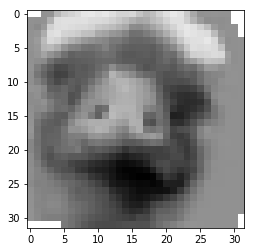

In [34]:
imgShow(train_data.iloc[1])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_data, labels)

X_train = X_train.values.reshape(X_train.shape[0], 32, 32, 1)
X_test = X_test.values.reshape(X_test.shape[0], 32, 32, 1)
test = test_data.values.reshape(test_data.shape[0], 32, 32, 1)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

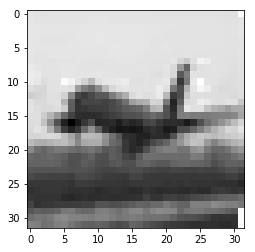

In [36]:
imgShow(test[1])

In [0]:
# Model 2 with 67% accuracy on 100 epochs

model2 = Sequential()
model2.add(Conv2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 1)))
model2.add(Activation('relu'))
model2.add(Conv2D(48, 3, 3))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Conv2D(96, 3, 3, border_mode='same'))
model2.add(Activation('relu'))
model2.add(Conv2D(96, 3, 3))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Conv2D(192, 3, 3, border_mode='same'))
model2.add(Activation('relu'))
model2.add(Conv2D(192, 3, 3))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(256))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.fit(X_train, y_train,batch_size=128, epochs=100, validation_data=(X_test, y_test))

In [37]:
# Model 1 with 64% accuracy

reg=None
num_filters=32
ac='relu'
adm=Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
opt=adm
drop_dense=0.5
drop_conv=0.5

model = Sequential()

model.add(Conv2D(num_filters, (3, 3), activation=ac, kernel_regularizer=reg, input_shape=(32, 32, 1),padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 16x16x3xnum_filters
model.add(Dropout(drop_conv))

model.add(Conv2D(2*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(2*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 8x8x3x(2*num_filters)
model.add(Dropout(drop_conv))

model.add(Conv2D(4*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(4*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 4x4x3x(4*num_filters)
model.add(Dropout(drop_conv))

model.add(Flatten())
model.add(Dense(512, activation=ac,kernel_regularizer=reg))
model.add(BatchNormalization())
model.add(Dropout(drop_dense))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=opt)
model.fit(X_train, y_train,batch_size=128, epochs=100, validation_data=(X_test, y_test))

Train on 36375 samples, validate on 12125 samples
Epoch 1/100
36375/36375 [==============================] - 23s 634us/step - loss: 2.3186 - acc: 0.2744 - val_loss: 1.9259 - val_acc: 0.3236
Epoch 2/100
36375/36375 [==============================] - 19s 515us/step - loss: 1.8557 - acc: 0.3878 - val_loss: 1.8938 - val_acc: 0.3595
Epoch 3/100
36375/36375 [==============================] - 18s 508us/step - loss: 1.6984 - acc: 0.4459 - val_loss: 1.9673 - val_acc: 0.3544
Epoch 4/100
36375/36375 [==============================] - 19s 511us/step - loss: 1.5757 - acc: 0.4878 - val_loss: 1.4188 - val_acc: 0.5282
Epoch 5/100
36375/36375 [==============================] - 19s 510us/step - loss: 1.4646 - acc: 0.5174 - val_loss: 1.3504 - val_acc: 0.5508
Epoch 6/100
36375/36375 [==============================] - 19s 510us/step - loss: 1.3565 - acc: 0.5469 - val_loss: 1.4182 - val_acc: 0.5325
Epoch 7/100
36375/36375 [==============================] - 18s 504us/step - loss: 1.2830 - acc: 0.5725 - val_l

In [0]:
# Prediction

res = model.predict_classes(test)

In [0]:
# File creation

submission = pd.read_csv('/content/mydrive/My Drive/DM_DATA/sample.csv')
submission['label'] = res
submission.to_csv('/content/mydrive/My Drive/DM_DATA/submission_model3.csv',index=False)